**NAMA : REZA WARDANI
nim  : E1E121088**


Pada tugas ini menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

# Evaluasi Matriks

**Import dataset**

In [1]:
import pandas as pd
import numpy as np

url = '/content/sample_data/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

Menampilkan data teratas

In [2]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Menghitung value dari kolom 'survival_status'

In [3]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

Menentukan label dan fitur serta membagi data menjadi data train dan data test

In [4]:
X = df.drop(['survival_status'], axis=1)
y = df['survival_status']

# spliting daa
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21, stratify=y)

Import model ML, cross val score, gscv dan matriks untuk evalusai ML serta menentukan cv score rata-rata

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
model_lr = LogisticRegression()
cv_score = cross_val_score(model_lr, X,y, scoring='roc_auc', cv=5)
cv_score.mean()

0.6942483660130719

Melakukan fitting model dan predicting untuk data test

In [6]:
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

Confussion matriks yang menunjukkan data TP, TN, FP, dan FN

In [7]:
confusion_matrix(y_test, y_pred, labels=[1,2])

array([[52,  5],
       [17,  3]])

Membuat report hasil akurasi,precisio, recall dan f1-score dari hasil prediksi

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.91      0.83        57
           2       0.38      0.15      0.21        20

    accuracy                           0.71        77
   macro avg       0.56      0.53      0.52        77
weighted avg       0.66      0.71      0.67        77



Kita coba secara manual menghitung recall dan precision

In [9]:
TP = 52
TN = 3
FP = 17
FN = 5

**Precision**

Precision menunjukkan hasil yang lebih menunjukkan keefektifan pada matriks True Negatif dan dangat menghidari adanya data yang False Positif

In [10]:
precision = TP/(TP+FP)
precision

0.7536231884057971

**Recall**

In [11]:
recall = TP/(TP+FN)
recall

0.9122807017543859

# Model Selection

Menggunakan GridSearchCV untuk hyperparameter tuning dan model selection dan model algoritma KNN sebagai model classifier.

> Menggunakan dataset yang sama dengan dataset untuk evaluasi matriks

**KNN**

Menggunakan gscv untuk tuning hyperparameter model algoritma KNN dengan n array 5-50 dan weights 'distance' dan 'uniform'

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model_knn =  KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(5,50), 'weights':['distance','uniform']}
gscv= GridSearchCV(model_knn,param_grid=param_grid, scoring='roc_auc', cv=5)
#latih model
gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             scoring='roc_auc')

Mendapatkan hyperparameter terbaik untuk kombinasi hyperparameterMendapatkan

In [13]:
gscv.best_params_

{'n_neighbors': 39, 'weights': 'uniform'}

Score validasi terbaik

In [14]:
gscv.best_score_

0.7130718954248365

Prediksi probabilitasi output

In [15]:
gscv.predict_proba(X_test)

array([[0.71794872, 0.28205128],
       [0.74358974, 0.25641026],
       [0.66666667, 0.33333333],
       [0.48717949, 0.51282051],
       [0.69230769, 0.30769231],
       [0.82051282, 0.17948718],
       [0.79487179, 0.20512821],
       [0.79487179, 0.20512821],
       [0.74358974, 0.25641026],
       [0.69230769, 0.30769231],
       [0.38461538, 0.61538462],
       [0.87179487, 0.12820513],
       [0.74358974, 0.25641026],
       [0.84615385, 0.15384615],
       [0.84615385, 0.15384615],
       [0.92307692, 0.07692308],
       [0.82051282, 0.17948718],
       [0.74358974, 0.25641026],
       [0.76923077, 0.23076923],
       [0.46153846, 0.53846154],
       [0.87179487, 0.12820513],
       [0.84615385, 0.15384615],
       [0.84615385, 0.15384615],
       [0.38461538, 0.61538462],
       [0.87179487, 0.12820513],
       [0.92307692, 0.07692308],
       [0.84615385, 0.15384615],
       [0.87179487, 0.12820513],
       [0.8974359 , 0.1025641 ],
       [0.82051282, 0.17948718],
       [0.

Menampilkan hasil prediksi dimana masing2 adalah nilai probabilitas untuk setiap class label dan urutan label dari hasil prediksi probabilitas.

In [16]:
gscv.classes_
gscv.predict_proba(X_test)[:,1]

array([0.28205128, 0.25641026, 0.33333333, 0.51282051, 0.30769231,
       0.17948718, 0.20512821, 0.20512821, 0.25641026, 0.30769231,
       0.61538462, 0.12820513, 0.25641026, 0.15384615, 0.15384615,
       0.07692308, 0.17948718, 0.25641026, 0.23076923, 0.53846154,
       0.12820513, 0.15384615, 0.15384615, 0.61538462, 0.12820513,
       0.07692308, 0.15384615, 0.12820513, 0.1025641 , 0.17948718,
       0.1025641 , 0.58974359, 0.20512821, 0.20512821, 0.51282051,
       0.20512821, 0.15384615, 0.20512821, 0.12820513, 0.20512821,
       0.48717949, 0.15384615, 0.25641026, 0.43589744, 0.20512821,
       0.07692308, 0.17948718, 0.1025641 , 0.12820513, 0.58974359,
       0.20512821, 0.58974359, 0.12820513, 0.23076923, 0.15384615,
       0.15384615, 0.15384615, 0.51282051, 0.17948718, 0.64102564,
       0.53846154, 0.17948718, 0.25641026, 0.15384615, 0.25641026,
       0.25641026, 0.23076923, 0.25641026, 0.35897436, 0.07692308,
       0.28205128, 0.12820513, 0.23076923, 0.58974359, 0.25641

In [17]:
cv_score_1 = cross_validate(model_knn, X,y, scoring='roc_auc', cv=5, return_train_score=True)
cv_score_2 = cross_val_score(model_knn, X,y, scoring='roc_auc')
cv_score_1

{'fit_time': array([0.00423789, 0.00195312, 0.00184917, 0.00187683, 0.00216985]),
 'score_time': array([0.00609446, 0.00288749, 0.0029223 , 0.0029285 , 0.00293612]),
 'test_score': array([0.69869281, 0.58263889, 0.69861111, 0.73055556, 0.54722222]),
 'train_score': array([0.85225694, 0.88098291, 0.83324786, 0.83435897, 0.86239316])}

In [18]:
def knn_pred(k):
  model = KNeighborsClassifier(n_neighbors=k)
  score = cross_validate(model, X,y, cv=10, return_train_score=True)
  train_score = score['train_score'].mean()
  test_score = score['test_score'].mean()
  return train_score, test_score

In [19]:
train_scores = []
test_scores = []

for k in range(2,100):
  train_score, test_score = knn_pred(k)
  train_scores.append(train_score)
  test_scores.append(test_score)

**Visualisasi score dari K data train dan data test**

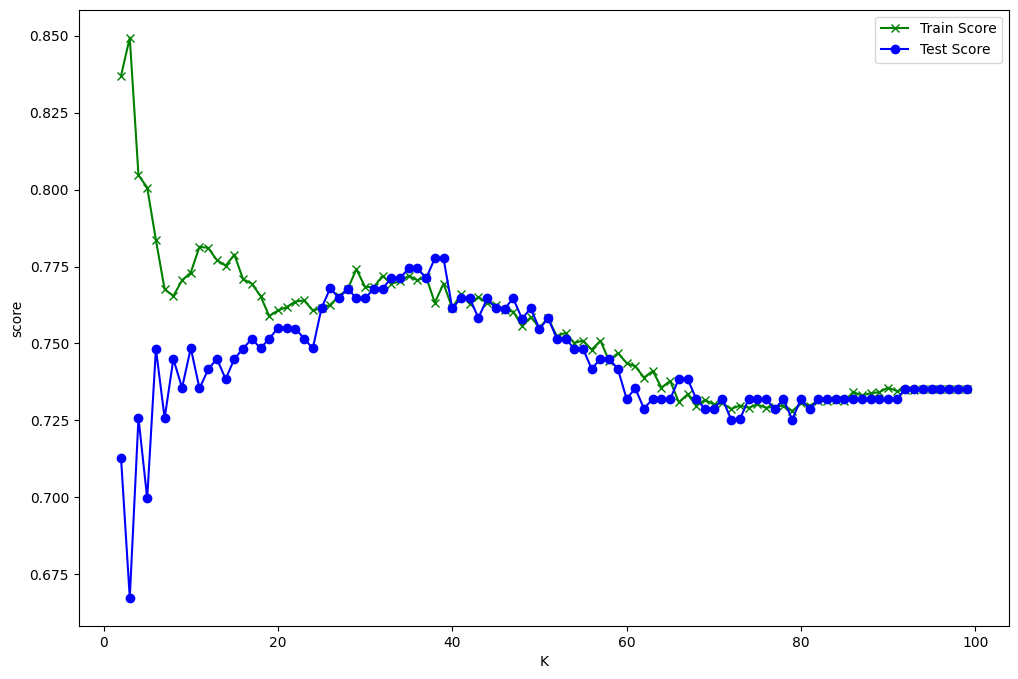

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(range(2,100), train_scores, marker='x', label='Train Score', color='g')
ax.plot(range(2,100), test_scores, marker='o', label='Test Score', c='b')

ax.set_xlabel('K')
ax.set_ylabel('score')

plt.legend()
plt.show()

> dari visualisasi diatas didapatkan model ini memberikan performa/skor baik dengan k = 40

**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
model_dt = DecisionTreeClassifier()
param_grid = {'splitter':['best','random'], 'criterion':['gini','entropy']}
rscv= RandomizedSearchCV(model_dt,param_distributions=param_grid,n_iter=100,scoring='roc_auc')
#latih model
rscv.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc')

Hyperparameter terbaik untuk kombinasi hyperparameter

In [23]:
rscv.best_params_

{'splitter': 'random', 'criterion': 'entropy'}

Prediksi probabilitasi output

In [24]:
rscv.predict_proba(X_test)

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

Menampilkan hasil prediksi dimana masing2 adalah nilai probabilitas untuk setiap class label dan urutan label dari hasil prediksi probabilitas.

In [25]:
rscv.classes_
rscv.predict_proba(X_test)[:,1]

array([1. , 0. , 0. , 1. , 0.5, 1. , 1. , 0. , 1. , 0.5, 0. , 0. , 1. ,
       0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 1. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ,
       0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 0. , 0.5, 1. , 0. , 0. , 1. ])

In [26]:
cv_score_1_ = cross_validate(model_dt, X,y, scoring='roc_auc', cv=5, return_train_score=True)
cv_score_2_ = cross_val_score(model_dt, X,y, scoring='roc_auc')
cv_score_1_

{'fit_time': array([0.00696349, 0.00218153, 0.00211573, 0.00204825, 0.00205231]),
 'score_time': array([0.00283861, 0.00225544, 0.00234246, 0.00227475, 0.00237679]),
 'test_score': array([0.51176471, 0.37430556, 0.58125   , 0.48472222, 0.57152778]),
 'train_score': array([0.99891493, 0.99931624, 0.99893162, 0.99893162, 0.99931624])}